In [453]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("always")
%matplotlib inline

In [2]:
from scipy.stats import cauchy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import expon

## Задание 2

$$Var(\bar{X}_n^2) = E(\bar{X}_n^4) - (E\bar{X}_n^2)^2$$

Сначала для $E(\bar{X}_n^4)$:
$$E(\bar{X}_n^4) =  E(\frac{1}{n}\sum (X_i - \bar{X}_n) + \bar{X}_n)^4 = $$
Обозначим, как $ S_n = \frac{1}{n}\sum (X_i - \bar{X}_n)$

$\bar{X}_n$ в данном случае -- эмпирическая величина, константа, будем выносить ее из под мат ожидания.
$$ = E(S_n + \bar{X}_n)^4 \\ = E(S_n^4 + 4\bar{X}_nS_n^3 + 6\bar{X}_n^2S_n^2 + 4\bar{X}_n^3S_n + \bar{X}_n^4) \\ = E(S_n^4) + 4\bar{X}_nE(S_n^3) + 6\bar{X}_n^2E(S_n^2) + \bar{X}_n^4 $$

Теперь (+ везде учитываем, что $S_n = 0$)
1. $$ E(S_n^4) = E(\frac{1}{n^4}[\sum(X_i - \bar{X}_n)^4 + \sum\sum(X_i - \bar{X}_n)^2(X_j - \bar{X}_n)^2]) = \\ =
\frac{\hat{\alpha}_4}{n^3} + \frac{3(n-1)\hat{\alpha}_2^2}{n^3}
$$
2. $$ E(S_n^3) = (\frac{1}{n^3}\sum(X_i - \bar{X}_n)^3) = \frac{\hat{\alpha}_3}{n^2}$$
3. $$E(S_n^2) = (\frac{1}{n^2}\sum(X_i - \bar{X}_n)^2) = \frac{\hat{\alpha}_2}{n}$$


Для $(E\bar{X}_n^2)^2$ аналогично:
$$E\bar{X}_n^2 = E(\frac{1}{n}\sum (X_i - \bar{X}_n) + \bar{X}_n)^2 = E(S_n^2 + 2S_n\bar{X}_n + \bar{X}_n^2) = \\ = ES_n^2 + \bar{X}_n^2 = \frac{\hat{\alpha}_2}{n} + \bar{X}_n^2$$


Итого, получаем:
$$\frac{\hat{\alpha}_4}{n^3} + \frac{3(n-1)\hat{\alpha}_2^2}{n^3} + \frac{4\bar{X}_n\hat{\alpha}_3}{n^2} + \frac{6\bar{X}_n^2\hat{\alpha}_2}{n} + \bar{X}_n^4 - \frac{\hat{\alpha}_2^2}{n^2} - \frac{2\bar{X}_n^2\hat{\alpha}_2}{n} - \bar{X}_n^4 = \\ = 
\frac{4\bar{X}_n^2\hat{\alpha}_2}{n} + \frac{4\bar{X}_n\hat{\alpha}_3}{n^2} + \frac{\hat{\alpha}_4}{n^3} + \frac{\hat{\alpha}_2^2(2n - 3)}{n^3}
$$

## Задание 3

1.
Можно доказать в общем случае.

$X_{(1)}, ..., X_{(n)}$ - исходная выборка, тогда для нее медиана $med = \theta = X_{(m)}$

$X^{*}_{(1)}, ..., X^{*}_{(n)}$ - исходная выборка, тогда для нее медиана $med = \hat{\theta} = X^{*}_{(m)}$

$$P(\hat{\theta} > x_{(k)}) = P\Big(\sum_{i = 0}^{k} \# \{ X^{*}_{(j)} == x_{(i)} \} \leq m - 1\Big) = $$
То есть для каждой порядковой статистики в исходной выборке, начиная от 1-й и до k-й, считаем количество равных им элементов в бутстрапной выборке. И так как мы рассмтариваем упорядоченные выборки, их общее кол-во должно быть меньше медианы m. Вполне очевидно, что это общее количество ($\sum\# \{ X^{*}_{(j)} == x_{(i)} \}$) достигается выбором k элементов из n, каждый с вероятностью k/n.
$$ \\
= P\Big(C^{k}_{n} \Big[\frac{k}{n}\Big]^{k} \Big[1 - \frac{k}{n}\Big]^{n - k} \leq m - 1\Big) = \\ =P\Big(Bi(n, \frac{k}{n}) \leq m - 1\Big) = \\ =\sum_{j = 0}^{m - 1} \Big[\frac{k}{n}\Big]^{j} \Big[1 - \frac{k}{n}\Big]^{n - j} = \\ = \sum_{j = 0}^{m - 1} Bi(j, n , \frac{k}{n})$$ 

Подставляя условие задачи и учитывая, что в случае 11 элементов медиана -- это 6я порядковая статистика, получаем:
$$P\Big(\hat{\theta} > x_{(i)}\Big) = \sum_{j = 0}^{5} Bi(j, 11, \frac{i}{11})$$

2.
Из первого следует 2-й пункт.

$$P\Big(\hat{\theta} = x_{(i)}\Big) = \\ = 1 - P\Big(\hat{\theta} > x_{(i)}\Big) - P\Big(\hat{\theta} < x_{(i)}\Big) = \\ = P\Big(\hat{\theta} \geq x_{(i)}\Big) - P\Big(\hat{\theta} > x_{(i)}\Big) = \\ =P\Big(\hat{\theta} > x_{(i - 1)}\Big) -  P\Big(\hat{\theta} > x_{(i)}\Big) = \\ = \sum_{j = 0}^{m-1} \Big[Bi(j, n, \frac{i-1}{n}) - Bi(j, n, \frac{i}{n}) \Big]$$

3.
Хотим найти $\Big[ \hat{\theta}_{low}, \hat{\theta}_{up} \Big] = \Big[ x_{(k_1)}, x_{(k_2)} \Big]$

Такой, что $P(\hat{\theta}_{low} \leq \hat{\theta} \leq \hat{\theta}_{up}) = P(x_{(k_1)} \leq \hat{\theta} \leq x_{(k_2)}) = 0.9$

$P(x_{(k_1)} \leq \hat{\theta} \leq x_{(k_2)}) = -P(\hat{\theta} \geq x_{(k_2)}) + P(\hat{\theta} \geq x_{(k_1)}) = \sum_{j = 0}^{m - 1} \Big[ Bi(j, n, \frac{k_1}{n}) - Bi(j, n, \frac{k_2}{n}) \Big]$

Используя подсказку из условия и 1 пункт, подсчитаем для $k_1, k_2 = 3, 9$

In [262]:
def compute_ci(k1, k2, N, m):
    p1 = k1 / N
    p2 = k2 / N
    Prob1 = 0
    Prob2 = 0

    for j in range(m):
        cnk = scipy.special.comb(N, j)
        Prob1 += cnk * (p1 ** j) * ((1 - p1) ** (N - j))
        Prob2 += cnk * (p2 ** j) * ((1 - p2) ** (N - j))
    return Prob1, Prob2

In [10]:
p1, p2 = compute_ci(3, 9, 11, 6)
p1 - p2

0.941546286195427

In [13]:
p1, p2 = compute_ci(3, 8, 11, 6)
p1 - p2

0.8975068079641584

Как видим выше, $[x_{(3)}, x_{(9)}]$ перепокрывает (0.94), а $[x_{(3)}, x_{(8)}]$ немного недопокрывает (0.8975), поэтому ответ $$\Big[ \hat{\theta}_{low}, \hat{\theta}_{up} \Big] = \Big[ x_{(3)}, x_{(9)} \Big]$$

В целом можно посчитать все возможные интервалы:

In [265]:
for i in range(1, 6):
    for j in range(6, 12):
        p1, p2 = compute_ci(i, j, 11, 6)
        print("low %d, up %d " % (i, j), p1 - p2)

low 1, up 6  0.6211946316302097
low 1, up 7  0.827078969656778
low 1, up 8  0.9485793115206888
low 1, up 9  0.9926187897519574
low 1, up 10  0.9996518150772195
low 1, up 11  0.9998259075386096
low 2, up 6  0.6141616063049472
low 2, up 7  0.8200459443315155
low 2, up 8  0.9415462861954262
low 2, up 9  0.9855857644266949
low 2, up 10  0.9926187897519569
low 2, up 11  0.992792882213347
low 3, up 6  0.5701221280736793
low 3, up 7  0.7760064661002476
low 3, up 8  0.8975068079641584
low 3, up 9  0.941546286195427
low 3, up 10  0.9485793115206891
low 3, up 11  0.9487534039820792
low 4, up 6  0.44862178620976856
low 4, up 7  0.6545061242363368
low 4, up 8  0.7760064661002476
low 4, up 9  0.8200459443315162
low 4, up 10  0.8270789696567783
low 4, up 11  0.8272530621181684
low 5, up 6  0.24273744818319998
low 5, up 7  0.4486217862097682
low 5, up 8  0.570122128073679
low 5, up 9  0.6141616063049476
low 5, up 10  0.6211946316302097
low 5, up 11  0.6213687240915998


## Задача 4

In [306]:
from scipy.stats import norm

In [307]:
data = pd.read_csv('номер 4/galaxies.csv', index_col=0)
data.head()

,dat
1,9172
2,9350
3,9483
4,9558
5,9775


(a).

In [308]:
X = data['dat'].values

In [309]:
start = 1000
end = 40000
x = np.linspace(start, end, 1000)

In [310]:
def get_density(x, h, X):
    return [np.mean(norm.pdf((x0 - X) / h))/h for x0 in x]

In [311]:
def is_unimodal(densities):
    peak_cnt = 0
    for i in range(1, len(densities) - 1):
        if densities[i-1] < densities[i] and densities[i] > densities[i+1]:
            peak_cnt += 1
    return peak_cnt == 1

In [312]:
def get_h_uni(x, X):
    left = 1e-2
    right = 5000

    while right - left > 0.1:
        h_min = (right + left) / 2
        dens = get_density(x, h_min, X)

        if is_unimodal(dens):
            right = h_min
        else:
            left = h_min
    return h_min

In [137]:
h_uni = get_h_uni(x, X)
h_uni

3045.88708694458

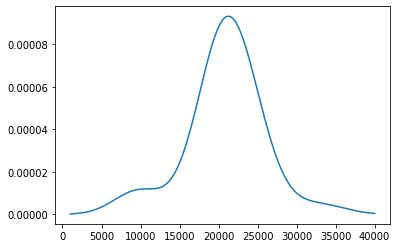

In [315]:
ds = get_density(x, h_uni, X)
plt.plot(x, ds)

In [316]:
is_unimodal(ds)

True

(b).

In [317]:
B = 100
N = len(X)

X_boots = np.random.choice(X, (B, N), replace=True)
e = h_uni * norm.rvs(loc=0, scale=1, size=(B, N))
X_boots = X_boots + e

In [318]:
cnt = 0
for i in tqdm(range(B)):
    h_min = get_h_uni(x, X_boots[i])
    if h_min >= h_uni:
        cnt += 1




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:02<03:30,  2.12s/it]


  2%|▏         | 2/100 [00:04<03:27,  2.12s/it]


  3%|▎         | 3/100 [00:06<03:26,  2.13s/it]


  4%|▍         | 4/100 [00:08<03:23,  2.12s/it]


  5%|▌         | 5/100 [00:10<03:19,  2.10s/it]


  6%|▌         | 6/100 [00:12<03:16,  2.09s/it]


  7%|▋         | 7/100 [00:14<03:14,  2.09s/it]


  8%|▊         | 8/100 [00:16<03:11,  2.08s/it]


  9%|▉         | 9/100 [00:18<03:09,  2.09s/it]


 10%|█         | 10/100 [00:20<03:07,  2.09s/it]


 11%|█         | 11/100 [00:23<03:05,  2.08s/it]


 12%|█▏        | 12/100 [00:25<03:02,  2.08s/it]


 13%|█▎        | 13/100 [00:27<03:01,  2.08s/it]


 14%|█▍        | 14/100 [00:29<02:58,  2.08s/it]


 15%|█▌        | 15/100 [00:32<03:15,  2.30s/it]


 16%|█▌        | 16/100 [00:34<03:07,  2.23s/it]


 17%|█▋        | 17/100 [00:36<03:01,  2.18s/it]


 18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]


 19%|█▉        | 19/100 [00:40<02:52,  2.12s/i

In [319]:
cnt/B

0.1

Найдем a, b, такие что 1-й и 2-й моменты эмперического и сглаженного распределений совпадают.

$$X^{*} \sim a + b(X + \hat{h}_{uni}\varepsilon), \varepsilon \sim N(0, 1)$$

Из первого момента выразим a:
$$\frac{1}{n}\sum{x_i} = \frac{1}{n}\sum(a + bh\varepsilon_i + bx_i) \\ \bar{x} = a + bh\bar{\varepsilon} + b\bar{x} \\ 
a = \bar{x}(1-b) - bh\bar{\varepsilon}$$

Подставим во второй момент и выразим b:

$$\frac{1}{n}\sum(x_i - \bar{x})^2 = \frac{1}{n}\sum(a + bh\varepsilon_i + bx_i - \bar{x})^2 \\ =\frac{1}{n}\sum b^2[(x_i - \bar{x}) - h(\bar{\varepsilon} - \varepsilon_i)]^2 = \\ =
\frac{b^2}{n}\sum [(x_i - \bar{x})^2 -2h(x_i - \bar{x})(\bar{\varepsilon} - \varepsilon_i) + h^2(\bar{\varepsilon} - \varepsilon_i)^2] = 
$$
Второе слагаемое обнуляется так как $\frac{1}{n}\sum (x_i - \bar{x}) = 0$
$$ = \frac{b^2}{n}\sum(x_i - \bar{x})^2 + b^2h^2\varepsilon^{'} $$
Отсюда
$$ b = \frac{1}{\sqrt{1 + \frac{nh^2\varepsilon^{'}}{\sum(x_i - \bar{x})^2}}}$$

Попробуем оценить вероятность по сглаженной выборке с найденными коэффициентами

In [321]:
meanX = np.mean(X)
b = 1 / np.sqrt(1 +  np.var(e) / np.var(X))
a = meanX*(1 - b) - b * np.mean(e)

In [322]:
X_boots2 = a + np.multiply(X_boots, b)

In [324]:
cnt2 = 0
for i in tqdm(range(B)):
    h_min = get_h_uni(x, X_boots2[i])
    if h_min >= h_uni:
        cnt2 += 1




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:02<03:32,  2.15s/it]


  2%|▏         | 2/100 [00:04<03:28,  2.13s/it]


  3%|▎         | 3/100 [00:06<03:25,  2.12s/it]


  4%|▍         | 4/100 [00:08<03:22,  2.11s/it]


  5%|▌         | 5/100 [00:11<03:44,  2.36s/it]


  6%|▌         | 6/100 [00:14<03:57,  2.52s/it]


  7%|▋         | 7/100 [00:17<04:15,  2.75s/it]


  8%|▊         | 8/100 [00:20<04:23,  2.87s/it]


  9%|▉         | 9/100 [00:23<04:29,  2.96s/it]


 10%|█         | 10/100 [00:25<04:02,  2.69s/it]


 11%|█         | 11/100 [00:27<03:42,  2.50s/it]


 12%|█▏        | 12/100 [00:30<03:28,  2.36s/it]


 13%|█▎        | 13/100 [00:32<03:26,  2.37s/it]


 14%|█▍        | 14/100 [00:35<03:50,  2.68s/it]


 15%|█▌        | 15/100 [00:38<03:59,  2.82s/it]


 16%|█▌        | 16/100 [00:42<04:18,  3.08s/it]


 17%|█▋        | 17/100 [00:45<04:01,  2.91s/it]


 18%|█▊        | 18/100 [00:47<03:48,  2.79s/it]


 19%|█▉        | 19/100 [00:50<03:45,  2.78s/i

In [325]:
cnt2 / B

0.02

(c).
Как я поняла, здесь нужно сэмплировать не из сглаженной выборки, как в предыдущем пункте, а из изначальной.

In [326]:
X_boots3 = np.random.choice(X, (B, N), replace=True)

cnt3 = 0
for i in tqdm(range(B)):
    h_min = get_h_uni(x, X_boots3[i])
    if h_min >= h_uni:
        cnt3 += 1




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:03<05:24,  3.28s/it]


  2%|▏         | 2/100 [00:05<04:53,  2.99s/it]


  3%|▎         | 3/100 [00:07<04:27,  2.75s/it]


  4%|▍         | 4/100 [00:10<04:09,  2.60s/it]


  5%|▌         | 5/100 [00:12<03:54,  2.47s/it]


  6%|▌         | 6/100 [00:14<03:42,  2.37s/it]


  7%|▋         | 7/100 [00:16<03:33,  2.30s/it]


  8%|▊         | 8/100 [00:18<03:28,  2.27s/it]


  9%|▉         | 9/100 [00:20<03:23,  2.24s/it]


 10%|█         | 10/100 [00:23<03:20,  2.22s/it]


 11%|█         | 11/100 [00:25<03:17,  2.22s/it]


 12%|█▏        | 12/100 [00:27<03:15,  2.22s/it]


 13%|█▎        | 13/100 [00:29<03:13,  2.22s/it]


 14%|█▍        | 14/100 [00:31<03:11,  2.23s/it]


 15%|█▌        | 15/100 [00:34<03:08,  2.22s/it]


 16%|█▌        | 16/100 [00:36<03:17,  2.35s/it]


 17%|█▋        | 17/100 [00:38<03:10,  2.29s/it]


 18%|█▊        | 18/100 [00:41<03:05,  2.26s/it]


 19%|█▉        | 19/100 [00:43<03:01,  2.24s/i

In [328]:
cnt3 / B

0.55

## Задание 5

In [234]:
cd4 = pd.read_csv('cd4.csv')

In [235]:
cd4.drop(cd4.columns.values[0], axis=1, inplace=True)

In [236]:
cd4

,baseline,oneyear
0,2.12,2.47
1,4.35,4.61
2,3.39,5.26
3,2.51,3.02
4,4.04,6.36
5,5.10,5.93
6,3.77,3.93
7,3.35,4.09
8,4.10,4.88
9,3.35,3.81


In [237]:
from sklearn.utils import resample

x = cd4['baseline'].values
y = cd4['oneyear'].values

R, _ = scipy.stats.pearsonr(x, y)
R

0.72316536789203

(a).

In [238]:
def percentile_confidence_interval(X, q=5):
    return np.percentile(X, q=q / 2), np.percentile(X, q=100 - q / 2)

In [239]:
B = 1000
N = len(x)

X_boots = []
Y_boots = []

t_boots = []
r_boots = []

for i in range(B):
    res = resample(cd4.values)
    x_boots, y_boots = res[:,0], res[:,1]
    
    r, _ = scipy.stats.pearsonr(x_boots, y_boots)
    sigma_boots = ((1 - r**2) / (N-2)) ** 0.5
    
    t_boots.append((r - R) / sigma_boots)
    r_boots.append(r)
    X_boots.append(x_boots)
    Y_boots.append(y_boots)

In [240]:
sigmaT = ((1 - R**2) / (N-2)) ** 0.5

In [241]:
def plot_cis(r_boots, t_boots, sigma, R):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

    # Normal CI
    z_025 = scipy.stats.norm.ppf(0.025)

    norm_up, norm_low = R - z_025 * sigma, R + z_025 * sigma

    ax[0].hist(r_boots, bins=100)
    ax[0].axvline(x=R, linewidth=2, color='r', label='true value')
    ax[0].axvline(x=norm_low, linewidth=1, color='g', linestyle='-')
    ax[0].axvline(x=norm_up, linewidth=1, color='g', linestyle='-', label='normal interval')
    ax[0].set_title('Normal CI')
    ax[0].legend()

    # Percentile CI
    low_r, high_r = percentile_confidence_interval(r_boots)

    ax[1].hist(r_boots, bins=100)
    ax[1].axvline(x=R, linewidth=2, color='r', label='true value')
    ax[1].axvline(x=low_r, linewidth=1, color='g', linestyle='-')
    ax[1].axvline(x=high_r, linewidth=1, color='g', linestyle='-', label='percentile interval')
    ax[1].set_title('Percentile CI')
    ax[1].legend()

    # Central CI
    cent_up, cent_low = 2 * R - low_r, 2 * R - high_r

    ax[2].hist(r_boots, bins=100)
    ax[2].axvline(x=R, linewidth=2, color='r', label='true value')
    ax[2].axvline(x= cent_low, linewidth=1, color='g', linestyle='-')
    ax[2].axvline(x= cent_up, linewidth=1, color='g', linestyle='-', label='central interval')
    ax[2].set_title('Central CI')
    ax[2].legend()

    # t-Bootstrap CI
    low_t, high_t = percentile_confidence_interval(t_boots)

    t_up, t_low = R - low_t * sigma, R - high_t * sigma

    ax[3].hist(r_boots, bins=100)
    ax[3].axvline(x=R, linewidth=2, color='r', label='true value')
    ax[3].axvline(x=t_low, linewidth=1, color='g', linestyle='-')
    ax[3].axvline(x=t_up, linewidth=1, color='g', linestyle='-', label='t_bootstrap interval')
    ax[3].set_title('t_bootstrap CI')

    plt.tight_layout()
    plt.legend()
    plt.show()

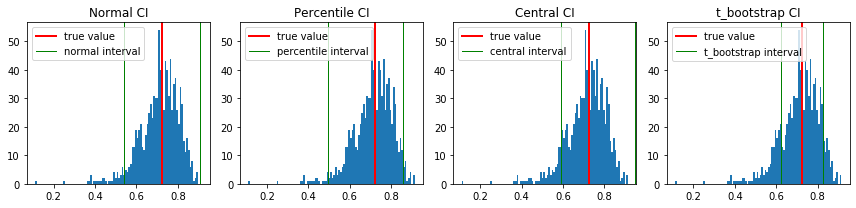

In [242]:
plot_cis(r_boots, t_boots, np.std(r_boots), R)

In [243]:
def normalizeR(r):
    return 0.5 * np.log((1 + r) / (1 - r))

normR = normalizeR(R)
norm_r_boots = np.array(list(map(normalizeR, r_boots)))
sigma_boots = 1 / (N - 3)**0.5
norm_t = (norm_r_boots - normR) / sigma_boots

Для нормализованных значений.

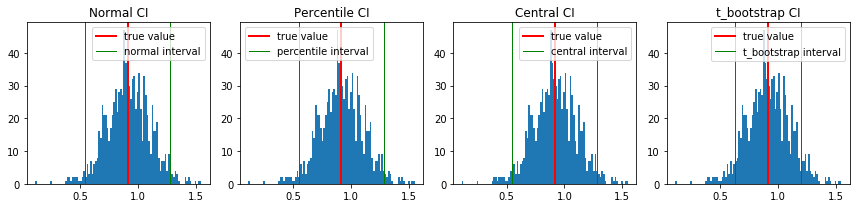

In [244]:
plot_cis(norm_r_boots, norm_t, np.std(norm_r_boots), normR)

In [245]:
def conv_back(r):
    t = np.exp(2 * r)
    return (t - 1) / (t + 1)

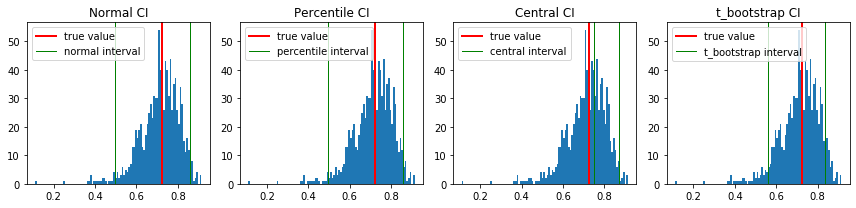

In [246]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

# Normal CI
z_025 = scipy.stats.norm.ppf(0.025)

norm0,norm1 = normR - z_025 * np.std(norm_r_boots), normR + z_025 * np.std(norm_r_boots)
norm0, norm1 = conv_back(norm0), conv_back(norm1)

ax[0].hist(r_boots, bins=100)
ax[0].axvline(x=R, linewidth=2, color='r', label='true value')
ax[0].axvline(x=norm0, linewidth=1, color='g', linestyle='-')
ax[0].axvline(x=norm1, linewidth=1, color='g', linestyle='-', label='normal interval')
ax[0].set_title('Normal CI')
ax[0].legend()

# Percentile CI
low_r, high_r = percentile_confidence_interval(norm_r_boots)
low_r, high_r = conv_back(low_r), conv_back(high_r)
ax[1].hist(r_boots, bins=100)
ax[1].axvline(x=R, linewidth=2, color='r', label='true value')
ax[1].axvline(x=low_r, linewidth=1, color='g', linestyle='-')
ax[1].axvline(x=high_r, linewidth=1, color='g', linestyle='-', label='percentile interval')
ax[1].set_title('Percentile CI')
ax[1].legend()

# Central CI

cent0, cent1 = 2 * normR - low_r, 2 * normR - high_r
cent0, cent1 = conv_back(cent0), conv_back(cent1)

ax[2].hist(r_boots, bins=100)
ax[2].axvline(x=R, linewidth=2, color='r', label='true value')
ax[2].axvline(x=cent0, linewidth=1, color='g', linestyle='-')
ax[2].axvline(x=cent1, linewidth=1, color='g', linestyle='-', label='central interval')
ax[2].set_title('Central CI')
ax[2].legend()

# t-Bootstrap CI
low_t, high_t = percentile_confidence_interval(norm_t)
t0, t1 = normR - low_t * np.std(norm_r_boots), normR - high_t * np.std(norm_r_boots)
t0, t1 = conv_back(t0), conv_back(t1)
ax[3].hist(r_boots, bins=100)
ax[3].axvline(x=R, linewidth=2, color='r', label='true value')
ax[3].axvline(x=t0, linewidth=1, color='g', linestyle='-')
ax[3].axvline(x=t1, linewidth=1, color='g', linestyle='-', label='t_bootstrap interval')
ax[3].set_title('t_bootstrap CI')

plt.tight_layout()
plt.legend()
plt.show()

(b).

Над каждой из бутстрапных выборок сделаем бутстрап и посчитаем $\theta_j^{**}$

In [247]:
C = 100
var = []
norm_var = []

for i in range(B):
    inner_r = []
    data = np.concatenate((X_boots[i].reshape(-1, 1), Y_boots[i].reshape(-1, 1)), axis=1)
    for j in range(C):
        res = resample(data)
        x_boots, y_boots = res[:,0], res[:,1]
    
        r, _ = scipy.stats.pearsonr(x_boots, y_boots)
        inner_r.append(r)
    var.append(np.std(inner_r))
    norm_var.append(np.std(list(map(normalizeR, inner_r))))

In [248]:
new_t_boots = (r_boots - R) / var

Без нормировки

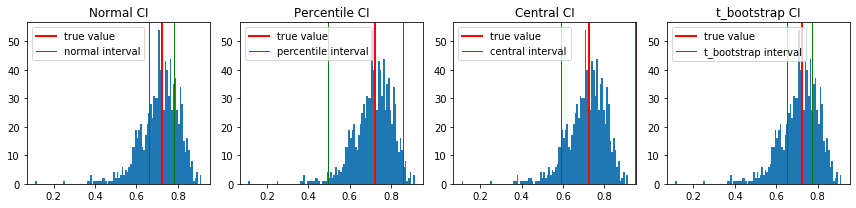

In [249]:
plot_cis(r_boots, new_t_boots, np.std(var), R)

In [250]:
new_norm_t = (norm_r_boots - normR) / norm_var

Нормализованные данные

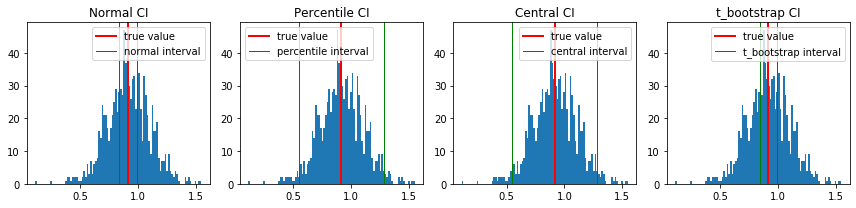

In [251]:
plot_cis(norm_r_boots, new_norm_t, np.std(norm_var), normR)

Как с нормализацией так и без, ДИ с бутстрапной дисперсией стал намного уже, что видно на графиках (для перцентильного и центрального, очевидно, все неизменно).

Бутстрапные дисперсии стали значительно меньше дисперсий, посчитанных аналитически:

In [78]:
np.std(r_boots), np.std(var)

(0.09329278093124789, 0.03146472381791537)

In [79]:
np.std(norm_r_boots), np.std(norm_var)

(0.19308112030477828, 0.041596459894963564)

(c).
$$\hat{\theta}_{(-i)} = \theta(X_{(-i)})$$

$$\hat{\theta}_{(\cdot)} = \frac{1}{N} \sum\limits_{i=1}^{N} \hat{\theta}_{(-i)}$$

$$\hat{bias}_{jack} = (n - 1) ( \hat{\theta}_{(\cdot)} - \hat{\theta})$$

In [252]:
jack_r = []

for i in range(N):
    x_j, y_j = np.delete(x, i), np.delete(y, i)
    r, _ = scipy.stats.pearsonr(x_j, y_j)
    jack_r.append(r)

In [253]:
bias = (N - 1)*(np.mean(jack_r) - R)
bias

-0.006784288235183067

## Задание 6

In [164]:
car_reduce = pd.read_table('car_reduced.table')
car_reduce

,purchase,income
0,1.0,72.0
1,0.0,19.0
2,0.0,23.0
3,0.0,33.0
4,1.0,60.0
5,1.0,92.0
6,0.0,10.0
7,1.0,61.0
8,0.0,16.0
9,1.0,40.0


In [260]:
car_reduce.groupby('purchase').sum()

,income
purchase,
0.0,101.0
1.0,325.0


1. Проблема Perfect Separation. То есть мы по признаку можем точно предсказать таргет. Например, для этой задачи имеем $y=1$ при $X_1 >= 40$ и $y=0$ при $X_1 < 40$

Модель логистической регрессии имеет вид:
$\pi_i = \frac{exp(\beta_0 + \beta_1 x_i)}{1 + exp(\beta_0 + \beta_1 x_i)}$

Построим Likelihood:

$p(x_i) = \pi_i ^{y_i}(1 - \pi_i)^{1 - y_i}$

$L = \prod \pi_i ^{y_i}(1 - \pi_i)^{1 - y_i}$

$$logL = \sum \Big[ y_ilog\pi_i + (1-y_i)log(1 - \pi_i)\Big] = \sum \Big[ y_i log\frac{\pi_i}{1 - \pi_i} + log(1 - \pi_i)\Big] = $$
$1 - \pi_i = \frac{1}{1 + exp(\beta_0 + \beta_1 x_i)}$

$log\frac{\pi_i}{1 - \pi_i} = \beta_0 + \beta_1 x_i = logit(\pi_i)$
$$ = \sum \Big[ y_i(\beta_0 + \beta_1 x_i) - log(1 + e^{\beta_0 + \beta_1 x_i}) \Big] \rightarrow max$$

Итак, надо максимизировать logL.

В случае конкретно этой задачи:

Обозначим $C_0 = \sum_{i: y_i = 0} x_i = 101 \\ C_1 = \sum_{i: y_i = 1} x_i = 325$

$logL = 5\beta_0 + \beta_1C_1 - \sum_{i = 1}^{10} log(1 + e^{\beta_0 +\beta_1x_i})$

$\frac{\partial logL}{\partial \beta_1} = C_1 - \sum_{i = 1}^{10} \frac{x_i e^{\beta_0 +\beta_1x_i}}{1 + e^{\beta_0 +\beta_1x_i}} = 0$

$C_1 - \sum_{i=1}^{10}x_i + \sum_{i=1}^{10} \frac{x_i}{1 + e^{\beta_0 +\beta_1x_i}} = 0$

$\sum_{i=1}^{10} \frac{x_i}{1 + e^{\beta_0 +\beta_1x_i}} = C_0 =  \sum_{i: y_i = 0} x_i = 101$

Отсюда следует, что если

$y_i = 0$ то $ : (1 + e^{\beta_0 +\beta_1x_i}) \rightarrow 1 \Rightarrow \beta_0 +\beta_1x_i \rightarrow -\infty$


$y_i = 1$ то $ : (1 + e^{\beta_0 +\beta_1x_i}) \rightarrow +\infty \Rightarrow \beta_0 +\beta_1x_i \rightarrow +\infty
$

In [454]:
from sklearn.linear_model import LogisticRegression
m0 = LogisticRegression().fit(y=car_reduce['purchase'], X=car_reduce[['income']])
m0.coef_

/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.04738341]])

In [455]:
mod1 = sm.Logit(car_reduce['purchase'], car_reduce[['income']]).fit()

Optimization terminated successfully.
         Current function value: 0.584143
         Iterations 5


In [429]:
b1 = (mod1.params.values)

In [430]:
def Likelihood(b, model):
    return -(model.loglike(b) + 0.5*np.log(np.linalg.det(-model.hessian(b))))

def Firth(y, X, v0=None, steps=1000, conv=0.0001):
    model = sm.Logit(y, X)
    
    if v0 is None:
        v0 = np.zeros(X.shape[1])
    
    b_i = []
    b_i.append(v0)
    
    for i in range(0, steps):
        pi = model.predict(b_i[i])
        
        W = np.diagflat(np.multiply(pi, 1-pi))
        H = np.linalg.pinv(-model.hessian(b_i[i]))
        M = np.dot(np.transpose(X), np.transpose(np.sqrt(W)))
        M = np.matmul(H, M)
        M = np.matmul(np.dot(np.sqrt(W), X), M)
        
        U = np.matmul(np.transpose(X), y - pi + np.multiply(np.diagonal(M), 1/2 - pi))
        new_beta = b_i[i] + np.matmul(H, U)

        j = 0
        while Likelihood(new_beta, model) > Likelihood(b_i[i], model) and j <= steps:
            new_beta = b_i[i] + 0.5*(new_beta - b_i[i])
            j = j + 1
            
        b_i.append(new_beta)
        if i > 0 and (np.linalg.norm(b_i[i] - b_i[i-1]) < conv):
            break

    return_fit = None
    b = b_i[-1]
    return b

In [431]:
b1_f = Firth(car_reduce['purchase'].values, car_reduce[['income']].values, b1)
b1_f

array([0.01693913])

In [434]:
print('b1 without regularization: ', b1, '\nb1 with regularization : ', b1_f)

b1 without regularization:  [0.02120392] 
b1 with regularization :  [0.01693913]


In [216]:
car = pd.read_table('car.table', sep='  ')
car.drop(columns='income', inplace=True)
car.reset_index(inplace=True)
car.rename(columns={"index": "purchase", "purchase": "income"}, inplace=True)
car

,purchase,income,age
0,0.0,32.0,3.0
1,0.0,45.0,2.0
2,1.0,60.0,2.0
3,0.0,53.0,1.0
4,0.0,25.0,4.0
5,1.0,68.0,1.0
6,1.0,82.0,2.0
7,1.0,38.0,5.0
8,0.0,67.0,2.0
9,1.0,92.0,2.0


In [335]:
import statsmodels.api as sm

In [457]:
m00 = LogisticRegression().fit(y=car['purchase'], X=car[['income', 'age']])
m00.coef_

/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.02708942, -0.02759484]])

In [443]:
mod = sm.Logit(car['purchase'], car[['income', 'age']], family=sm.families.Binomial()).fit()

Optimization terminated successfully.
         Current function value: 0.657142
         Iterations 4


In [444]:
b1, b2 = (mod.params.values)
b1, b2

(0.015304929888935772, -0.23440449364105673)

In [445]:
b1_f, b2_f = Firth(car['purchase'].values, car[['income', 'age']].values)
b1_f, b2_f

(0.013826314526343388, -0.21461705618976243)

In [446]:
mod3 = sm.GLM(car['purchase'], car[['income', 'age']], family=sm.families.Binomial()).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               purchase   No. Observations:                   33
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.686
Date:                Sun, 22 Dec 2019   Deviance:                       43.371
Time:                        21:13:44   Pearson chi2:                     32.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income         0.0153      0.012      1.276      0.202      -0.008       0.039
age           -0.2344      0.161     -1.452      0.146      -0.551       0.082
==============================================================================
"""

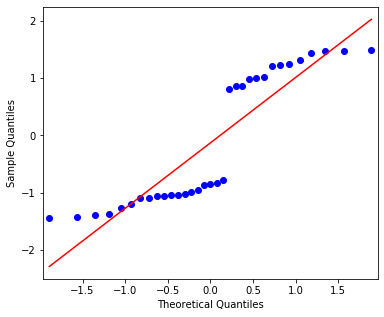

In [464]:
res = mod3.resid_deviance
fig = sm.qqplot(res, line='s')
fig.set_figheight(5)
fig.set_figwidth(6)
plt.show()

QQ-plot показывает насколько нормально распределены остатки. По получившемуся графику, так как это остатаки девиансы значительно ненормальны, что часто проиходит в логистической регрессии.